In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle
#warnings
import warnings
warnings.filterwarnings('ignore')

#***Load the Dataset:-***

In [32]:
#load the dataset
df=pd.read_csv('/content/student_performance_prediction.csv')

In [33]:
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [34]:
#shape
df.shape

(40000, 7)

#***EDA(Explotary Data Analysis):-***

In [35]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [36]:
#check the null values
df.isnull().sum()

,0
Student ID,0
Study Hours per Week,1995
Attendance Rate,1992
Previous Grades,1994
Participation in Extracurricular Activities,2000
Parent Education Level,2000
Passed,2000


In [37]:
#drop the null values
df.dropna(inplace=True)

In [38]:
#check the null
df.isnull().sum().any()

False

In [39]:
#check the duplicates rows
df.duplicated().sum()

0

In [40]:
#drop the unncessary column
df.drop('Student ID',axis=1,inplace=True)

In [41]:
#describe the dataset
df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,29446.000000,29446.000000,29446.000000
mean,9.964953,75.308582,65.412986
std,5.025682,20.399216,16.591152
min,-9.200000,-14.300000,8.300000
25%,6.600000,61.600000,54.900000
50%,10.000000,75.300000,65.200000
75%,13.400000,88.800000,75.200000
max,32.400000,150.200000,200.000000


In [42]:
#shape of datset
df.shape

(29446, 6)

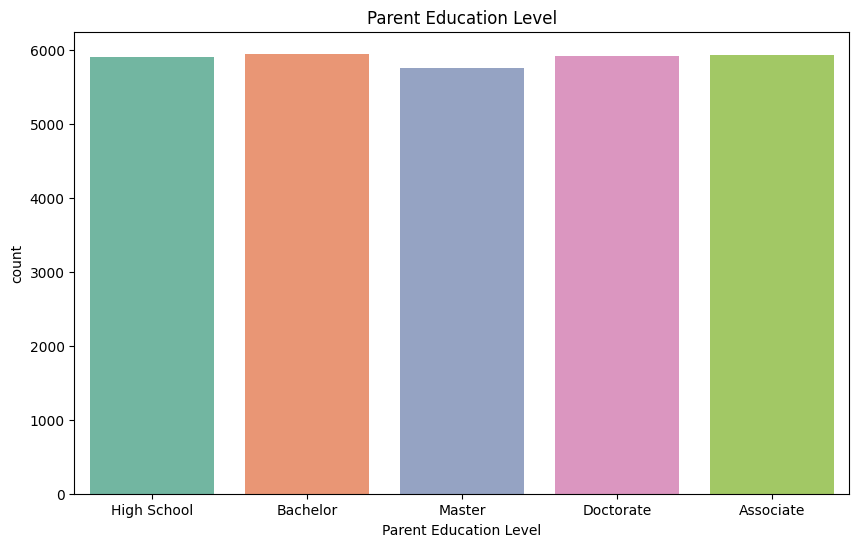

In [43]:
#data visualization Parent Education Level bar chart
sns.color_palette("Set2")
plt.figure(figsize=(10,6))
sns.countplot(x='Parent Education Level',data=df,palette='Set2')
plt.title('Parent Education Level')
plt.show()

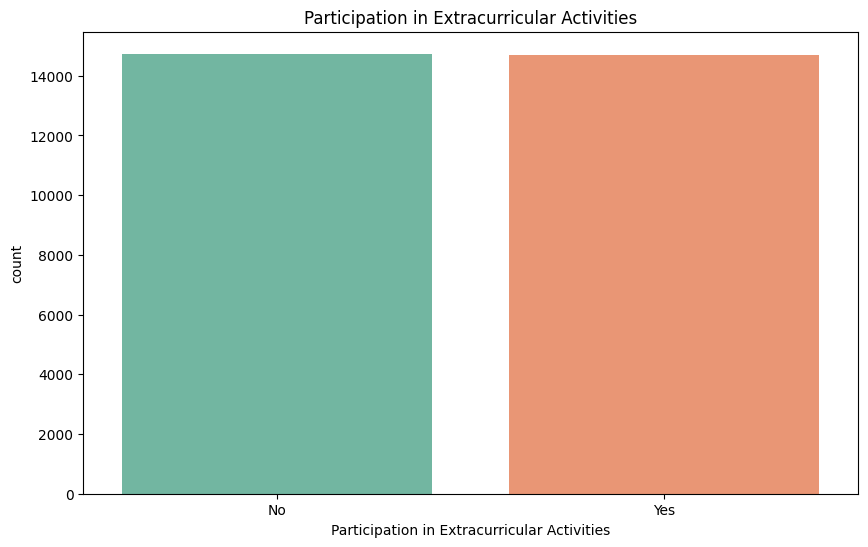

In [44]:
#Participation in Extracurricular Activities bar chart
plt.figure(figsize=(10,6))
sns.countplot(x='Participation in Extracurricular Activities',data=df,palette='Set2')
plt.title('Participation in Extracurricular Activities')
plt.show()

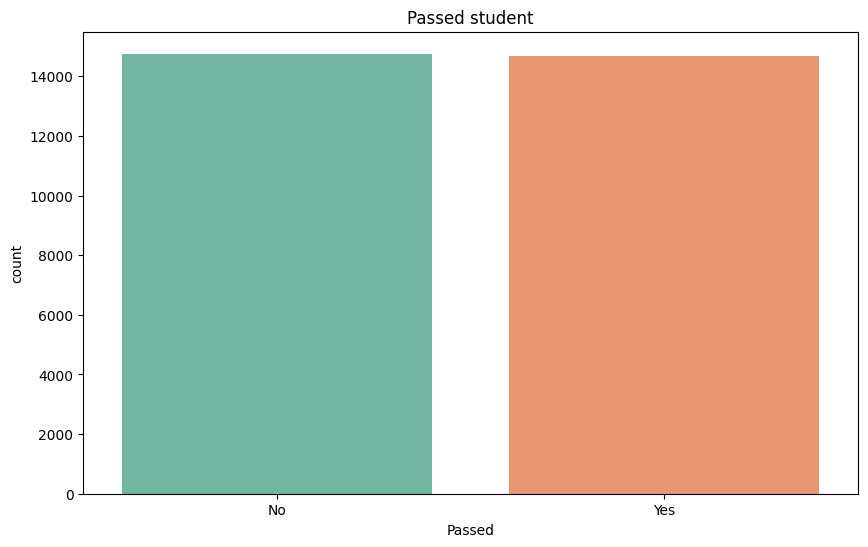

In [45]:
#Passed bar chart
plt.figure(figsize=(10,6))
sns.countplot(x='Passed',data=df,palette='Set2')
plt.title('Passed student')
plt.show()

In [46]:
#categorical columns
cate_col=df.select_dtypes(include='object').columns
cate_col

Index(['Participation in Extracurricular Activities', 'Parent Education Level',
       'Passed'],
      dtype='object')

In [47]:
#check the all categorical column unique values
for i in cate_col:
  print(i)
  print(df[i].unique())

Participation in Extracurricular Activities
['No' 'Yes']
Parent Education Level
['High School' 'Bachelor' 'Master' 'Doctorate' 'Associate']
Passed
['No' 'Yes']


#***Label encoding:-***

In [48]:
le_dict = {}  # Dictionary to store encoders for each column
le=LabelEncoder()
for i in cate_col:
  df[i]=le.fit_transform(df[i])
  le_dict=le
  print(i)

Participation in Extracurricular Activities
Parent Education Level
Passed


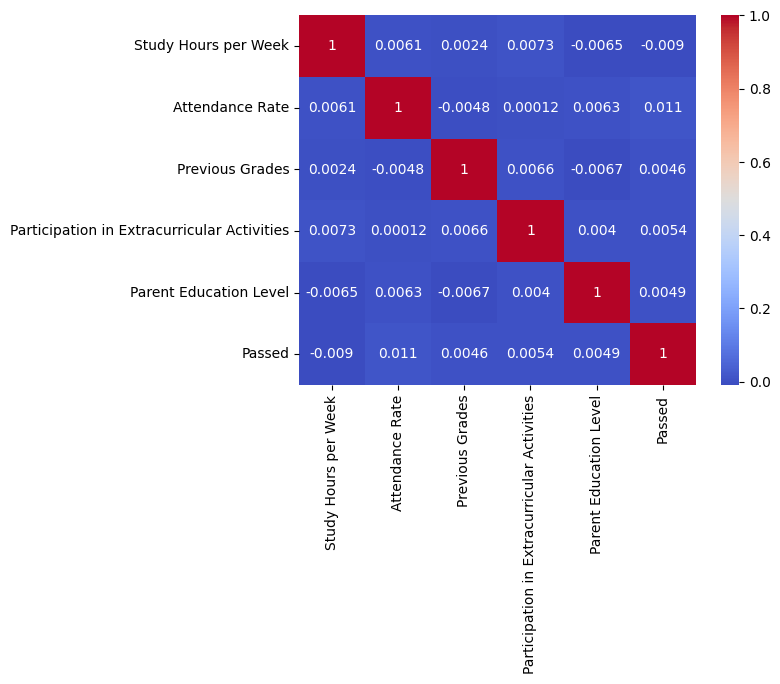

In [49]:
#correlation features
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

#***Split the Dataset:-***

In [50]:
#spliting the dataset
X=df.drop('Passed',axis=1)
y=df['Passed']

In [51]:
#spliting into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
#shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((23556, 5), (5890, 5), (23556,), (5890,))

#***Building model:-***

In [53]:
#model training
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
#evaluation model
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.50


#***Save the model:-***

In [55]:
# Save label encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(le_dict, f)
print("Label encodding the sucessfully")

Label encodding the sucessfully


In [56]:
# Save model and label encoder
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model saved successfully!")

Model saved successfully!
